In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv("Fraud Detection Dataset.csv")
df.head(2)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [27]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [28]:
df.shape

(51000, 12)

In [29]:
##Checking for Missing Observations
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [30]:
#Checking Missing Values
features=[i for i in df.columns if df[i].isnull().sum()>=1]
for j in features:
    print(j,np.round(df[j].isnull().mean()*100,5),'% missing values')

Transaction_Amount 4.94118 % missing values
Time_of_Transaction 5.00392 % missing values
Device_Used 4.84902 % missing values
Location 4.99412 % missing values
Payment_Method 4.84118 % missing values


In [31]:
#Replacing null values with the median for numerical features and mode for categorical features
df['Transaction_Amount'].fillna(df['Transaction_Amount'].median(),inplace=True)
df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].median(),inplace=True)
df['Device_Used'].fillna(df['Device_Used'].mode()[0],inplace=True)
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0],inplace=True)


In [32]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [33]:
#Removing insignificant Features
df.drop(['Transaction_ID','User_ID'],axis=1,inplace=True)

In [34]:
##To check all unique values
df['Payment_Method'].value_counts()

Payment_Method
UPI               14356
Debit Card        11802
Net Banking       11666
Credit Card       11646
Invalid Method     1530
Name: count, dtype: int64

In [35]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
num_features

Num of Numerical Features : 6


['Transaction_Amount',
 'Time_of_Transaction',
 'Previous_Fraudulent_Transactions',
 'Account_Age',
 'Number_of_Transactions_Last_24H',
 'Fraudulent']

In [36]:
##get all the categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


In [37]:
num_features1=num_features.remove('Fraudulent')

In [38]:
##Discreet Features
disc_feat=[features for features in num_features if len(df[features].unique())<=25 ]
print(len(disc_feat))

3


In [39]:
##Continuous Features
cont_feat=[features for features in num_features if features not in disc_feat ]
print(len(cont_feat))

2


In [40]:
df.shape

(51000, 10)

MACHINE LEARNING TRAINING

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,recall_score,f1_score,precision_score,accuracy_score

In [ ]:
y_old=df['Fraudulent']  #Dependent Features
x_old=df.drop('Fraudulent',axis=1) #Independent Features
x_old.head(2)


,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method
0,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card
1,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card


In [ ]:
cat_features = x_old.select_dtypes(include=['object', 'category']).columns.tolist()
num_features1 = x_old.select_dtypes(include=['int64', 'float64']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),  #OneHot Encoding for categorical features
          ("StandardScaler", numeric_transformer, num_features1) #Normalisation of Numerical Features
    ]
)

In [44]:
x_old=preprocessor.fit_transform(x_old)


In [45]:
y_old.value_counts()

Fraudulent
0    48490
1     2510
Name: count, dtype: int64

In [46]:
##As it is a severely imbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x_old, y_old)

  File "c:\Users\ASUS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ASUS\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [47]:
y.shape

(96980,)

In [ ]:
#Creating Train and Test Dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5476
- F1 score: 0.5473
- Precision: 0.5508
- Recall: 0.5213
- Roc Auc Score: 0.5476
----------------------------------
Model performance for Test set
- Accuracy: 0.5474
- F1 score: 0.5472
- Precision: 0.5484
- Recall: 0.5241
- Roc Auc Score: 0.5473


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9373
- F1 score: 0.9373
- Precision: 0.9308
- Recall: 0.9446
- Roc Auc Score: 0.9374


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9773
- F1 score: 0.9773
- Precision: 0.9978
- Recall: 0.9567
- Roc Auc Score: 0.9773


KNeighborsClassifier
Model performance for Train

In [50]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [51]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [52]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


Accuracy= 0.9771774248986045
F1 SCore= 0.9765982942130119
Recall= 0.9994229243309529


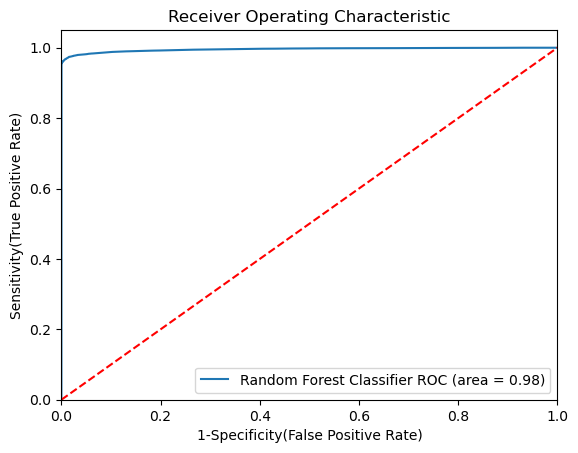

In [ ]:
#Fitting the tuned model
rf_model=RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

#Performance Metrics
print("Accuracy=",accuracy_score(y_pred,y_test))
print("F1 SCore=",f1_score(y_pred,y_test))
print("Recall=",recall_score(y_pred,y_test))

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Random Forest Classifier',0.976))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 




In [54]:
import pickle 

In [58]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_features=8, n_estimators=1000)

In [ ]:
#Creating the pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)    